In [1]:
# 导入需要的包
import numpy as np 
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
# 从txt xyzi 格式的点云文件中获取数据 i指亮度
pointCloud = np.genfromtxt('./1.txt',delimiter=', ')
pointCloud

array([[-104.8   ,  -49.7376,  192.0104,   35.    ],
       [-104.7   ,  -49.7376,  192.0104,   36.    ],
       [-104.6   ,  -49.7376,  192.0008,   36.    ],
       ...,
       [ 102.6   ,   49.7376,  195.6008,   89.    ],
       [ 102.7   ,   49.7376,  195.656 ,   35.    ],
       [ 102.8   ,   49.7376,  195.6248,   14.    ]])

In [3]:
#获取图像尺寸大小
#以每个坐标轴上左边点出现的次数为准
columns = np.unique(pointCloud[:,0])
rows = np.unique(pointCloud[:,1])
column = len(np.unique(pointCloud[:,0]))
row = len(np.unique(pointCloud[:,1]))
print('row=%d column=%d'%(row,column))

row=199 column=2080


In [4]:
#使用map保存图像坐标，同时提高速度
colMap = {}
rowMap = {}
for i in range(len(columns)):
    colMap[columns[i]] = i
for i in range(len(rows)):
    rowMap[rows[i]] = i

In [5]:
#将高度由映射至0-255
depth = pointCloud[:,2]
print(np.min(depth))
depth = np.subtract(depth,np.min(depth))
print(np.max(depth))
#此时高度集中在0-28.257,后续需要均衡化提示对比度

191.7392
28.257599999999996


In [6]:
dethPicture = np.zeros((row,column),dtype=np.uint8)
identityPicture = np.zeros((row,column),dtype=np.uint8)

for data in pointCloud:
    x = colMap[data[0]]
    y = rowMap[data[1]]
    dethPicture[y][x] = data[2]
    identityPicture[y][x] = data[3]

In [7]:
cv.imwrite('./depth.png',dethPicture)
cv.imwrite('./identity.png',identityPicture)

True

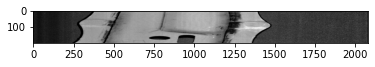

In [8]:
plt.imshow(identityPicture,cmap='gray')

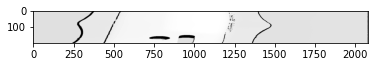

In [9]:
plt.imshow(dethPicture,cmap='gray')

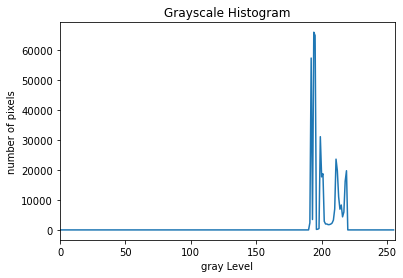

In [10]:
hist = cv.calcHist([dethPicture], [0], None, [256], [0, 256])
hist[0] = 0
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("gray Level")
plt.ylabel("number of pixels")
plt.xlim([0, 256])
plt.plot(hist)

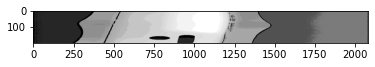

In [11]:
equalize = cv.equalizeHist(dethPicture)
cv.imwrite('./equalize.png',equalize)
plt.imshow(equalize,cmap='gray')

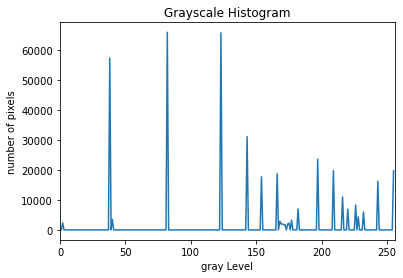

In [12]:
hist = cv.calcHist([equalize], [0], None, [256], [0, 256])
hist[0] = 0
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("gray Level")
plt.ylabel("number of pixels")
plt.xlim([0, 256])
plt.plot(hist)

True

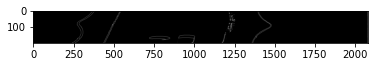

In [13]:
laplacian = cv.Laplacian(dethPicture,cv.CV_8U)
plt.imshow(laplacian,cmap='gray')
cv.imwrite('./depth_laplacian.png',laplacian)

True

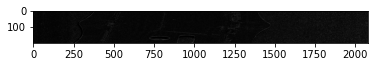

In [14]:
laplacian = cv.Laplacian(identityPicture,cv.CV_8U)
plt.imshow(laplacian,cmap='gray')
cv.imwrite('./identity_laplacian.png',laplacian)